In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

tf.random.set_seed(42)
np.random.seed(42)


In [2]:
x1 = np.random.rand(4000)*10
x2 = np.random.rand(4000)*10
x3 = np.random.rand(4000)*10

x1_int = x1.astype(int) - 5
x2_int = x2.astype(int) - 5
x3_int = x3.astype(int) - 5

x1_str = x1_int.astype(str)
x2_str = x2_int.astype(str)
x3_str = x3_int.astype(str)

unique_expressions = set()

for i in range(len(x1)):
  n = np.random.rand(1)
  if n < 0.25:
    opp1 = " + "
    opp2 = " + "
  elif n > 0.25 and n < 0.5:
    opp1 = " + "
    opp2 = " - "
  elif n > 0.75:
    opp1 = " - "
    opp2 = " + "
  else:
    opp1 = " - "
    opp2 = " - "
  unique_expressions.add(x1_str[i] + opp1 + x2_str[i] + opp2 + x3_str[i])

x = list(unique_expressions) # Convert the set back to a list
print(x[0])
print(len(x))
diff_x = x

0 + -2 - -2
2543


In [3]:
y = []

for expression in x:
  result = float(eval(expression))
  y.append(result)

print(y[0])
diff_y = y

0.0


In [4]:
def tokenizer(input_list): # Changed parameter name to avoid confusion with global x
  #tokenizer by hand
  #tokens = (len(input_list), 5)
  # Create a copy of the input list to avoid modifying the original
  tokenized_x = [expression.split(" ") for expression in input_list]


  for i in range(len(tokenized_x)):
    for j in range(len(tokenized_x[i])):
      if j % 2 == 0:  # Check if the index is even
        tokenized_x[i][j] = np.float32(tokenized_x[i][j])
      else:  # The index is uneven, it's an operator
        if tokenized_x[i][j] == "+":
          tokenized_x[i][j] = np.float32(1)
        else:
          tokenized_x[i][j] = np.float32(0)
    padding_count = 15 - len(tokenized_x[i])
    for _ in range(padding_count): # Use a throwaway variable
      tokenized_x[i].append(np.float32(0.5))
  tokenized_x = np.array(tokenized_x)
  return tokenized_x
x = tokenizer(x)

In [5]:
# Generate all possible expressions
all_possible_expressions = set()
for num1 in range(-5, 5): # Range -5 to 4
    for num2 in range(-5, 5): # Range -5 to 4
        for num3 in range(-5, 5): # Range -5 to 4
            for op1 in [" + ", " - "]:
                for op2 in [" + ", " - "]:
                    expression = str(num1) + op1 + str(num2) + op2 + str(num3)
                    all_possible_expressions.add(expression)

# Find expressions not in x
expressions_not_in_x = all_possible_expressions - unique_expressions
expressions_not_in_x = list(expressions_not_in_x)
print("\nExpressions not in x:")
print(expressions_not_in_x[0]) # Convert back to a list for printing
if len(expressions_not_in_x)+len(x) == 4000: print(True)
print(len(expressions_not_in_x))

x_test = np.array(tokenizer(expressions_not_in_x))

y_test = []
for expression in expressions_not_in_x:
    y_test.append(float(eval(expression)))

print(y_test[0])


Expressions not in x:
-5 - 4 - -4
True
1457
-5.0


In [6]:
#a list of expressions outside the number range
outsideExpr = set()
range1= range(5, 9)
range2= range(-8, -4)
comboRange = list(range1) + list(range2)
for num1 in comboRange:
    for num2 in comboRange:
        for num3 in comboRange:
            for op1 in [" + ", " - "]:
                for op2 in [" + ", " - "]:
                    expression = str(num1) + op1 + str(num2) + op2 + str(num3)
                    outsideExpr.add(expression)

outsideExpr = list(outsideExpr)
print(len(tokenizer(outsideExpr)[0]))

out_x_test = tokenizer(outsideExpr)
out_y_test = []
for i in outsideExpr:
  result = float(eval(i))
  out_y_test.append(result)

15


In [7]:
minNums = 2
maxNums = 8
amountNums = 100
num_terms = np.arange(minNums-1,maxNums)
longer_Exps = []
for j in num_terms:
  for p in range(amountNums):
    longer_Exp = ""
    for i in range(j):
      longer_Exp += str(np.random.randint(-5,6))
      longer_Exp += np.random.choice([" + ", " - "])
    longer_Exp += str(np.random.randint(-5,6))
    longer_Exps.append(longer_Exp)
print(longer_Exps)

longer_Exps = list(longer_Exps)
long_x_test = tokenizer(longer_Exps)
long_y_test = []
for i in longer_Exps:
  result = float(eval(i))
  long_y_test.append(result)
print(long_y_test[0])
print(long_x_test[0])

['-5 + 1', '-2 + -4', '-1 - -1', '-4 + 5', '0 - -2', '-5 + 3', '4 + 0', '-5 - 3', '3 + 0', '1 - 4', '2 - 0', '3 + -4', '-4 - 1', '0 + -3', '-1 - 0', '-4 + 1', '2 - -5', '-4 - -2', '1 - 0', '-4 - 1', '-4 + 3', '-2 - -1', '3 + 2', '5 + 5', '5 - 1', '-2 - 4', '0 + -4', '-5 - -5', '-5 + -1', '3 + 4', '-4 - -5', '-5 - 4', '4 - -4', '3 + -4', '-3 - 0', '1 - 0', '-3 - -3', '-4 - -4', '5 - -1', '5 - 5', '2 - 3', '5 + 4', '-2 + 4', '5 - -1', '-5 + -1', '-1 + -4', '0 + -4', '4 + 2', '0 + 4', '5 + 3', '5 + -2', '-3 - 1', '2 + -5', '-5 + -1', '2 - 4', '5 + 2', '-3 - 4', '1 + -2', '2 - 3', '-2 + -2', '-1 + 1', '3 - 3', '-5 + 0', '-3 - -2', '2 + -2', '2 - 3', '0 + 4', '-4 + 4', '1 + -5', '2 + 4', '5 + 5', '4 + 1', '4 - -5', '-3 + -4', '-5 + -3', '4 + 2', '0 - 3', '3 - 5', '0 - 3', '-4 + 0', '-4 + -4', '-2 + 5', '5 + -1', '0 + 1', '4 - 3', '-2 - 1', '4 - 5', '3 + -4', '5 - 4', '4 - -1', '-1 - -5', '0 - 3', '0 + 1', '-2 - 4', '-5 + 0', '-3 - 4', '0 - 3', '-2 + -1', '-3 - 2', '4 + 3', '4 + 3 - -1', '5 

In [8]:
x_train, x_val, y_train, y_val = \
    train_test_split(x, y, train_size=0.75)
x_train, x_val, y_train, y_val = \
    np.array(x_train), np.array(x_val), np.array(y_train), np.array(y_val)


In [9]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
    monitor='mse',
    mode = "min"
)

In [10]:
def create_basemodel(input_shape):
    model = keras.Sequential([
        keras.Input(shape=(input_shape, 1)),
        keras.layers.SimpleRNN(50, return_sequences=True),
        keras.layers.PReLU(),
        keras.layers.SimpleRNN(50),
        keras.layers.PReLU(),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse", metrics=['mse'])
    return model

In [11]:
n_bootstrap = 10
bootstrap_predsInRange = []
bootstrap_predsOutRange = []
bootstrap_predsLongRange = []

for _ in range(n_bootstrap):
    # Create bootstrap sample
    sample_indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
    x_train_bootstrap = x_train[sample_indices]
    y_train_bootstrap = np.array(y_train)[sample_indices]
    
    bootstrap_model = create_basemodel(len(x_train[0]))

    bootstrap_model.compile(optimizer = "adam", loss = "mse", metrics=['mse'])

    bootstrap_train_dataset = tf.data.Dataset.from_tensor_slices((x_train_bootstrap, y_train_bootstrap)).batch(32)
    bootstrap_model.fit(
    bootstrap_train_dataset,
    epochs=100,
    verbose=0, # Suppress output
    callbacks=[early_stopping]
    )
    bootstrap_predsInRange.append(bootstrap_model.predict(x_test))
    bootstrap_predsOutRange.append(bootstrap_model.predict(out_x_test))
    bootstrap_predsLongRange.append(bootstrap_model.predict(long_x_test))
    
bootstrap_model.summary()

    

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
64/64 ━━━━━━━━━━━━

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_18 (SimpleRNN)            │ (None, 15, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_18 (PReLU)                   │ (None, 15, 50)              │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_19 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_19 (PReLU)                   │ (None, 50)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,505 (99.63 KB)

 Trainable params: 8,501 (33.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,004 (66.43 KB)

In [12]:
predsInRange = []
for i in range(len(x_test)):
    calc = 0
    for j in range(n_bootstrap):
        calc += bootstrap_predsInRange[j][i]
    predsInRange.append(calc/n_bootstrap)


In [13]:
predsOutRange = []
for i in range(len(out_x_test)):
    calc = 0
    for j in range(n_bootstrap):
        calc += bootstrap_predsOutRange[j][i]
    predsOutRange.append(calc/n_bootstrap)


In [14]:
predsLongRange = []
for i in range(len(long_x_test)):
    calc = 0
    for j in range(n_bootstrap):
        calc += bootstrap_predsLongRange[j][i]
    predsLongRange.append(calc/n_bootstrap)


In [15]:
differences = []
relativeError = []
out_differences = []
out_relativeError = []

for i in range(len(predsInRange)):
    differences.append(abs(predsInRange[i]-y_test[i]))
print(np.mean(differences))
avDifference = np.mean(differences)

for i in range(len(y_test)):
  if y_test[i] != 0:
    relativeError.append(differences[i]/abs(y_test[i]))
  else:
    relativeError.append(differences[i])
print(np.mean(relativeError))
avRelError = np.mean(relativeError)

for i in range(len(predsOutRange)):
    out_differences.append(abs(predsOutRange[i]-out_y_test[i]))
print(np.mean(out_differences))
av_out_Difference = np.mean(out_differences)

for i in range(len(out_y_test)):
  if out_y_test[i] != 0:
    out_relativeError.append(out_differences[i]/abs(out_y_test[i]))
  else:
    out_relativeError.append(out_differences[i])
print(np.mean(out_relativeError))
av_out_RelError = np.mean(out_relativeError)


0.1483764
0.058715183
3.5811484
0.35438412


In [16]:
def absSum(x):
  expressions = x
  p = []
  for i in range(len(expressions)):
    components = []
    components = expressions[i].split(" ")
    p.append(abs(int(components[0])) + abs(int(components[2])) + abs(int(components[4])))
  return p

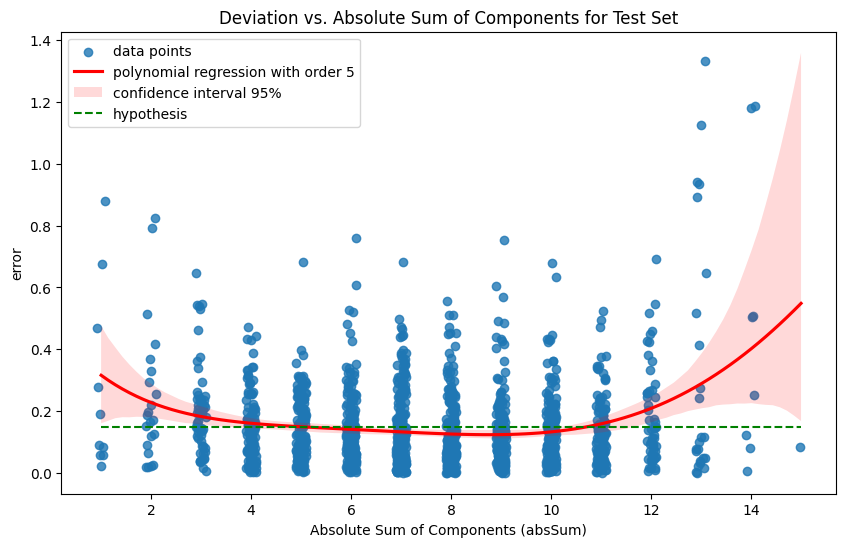

In [17]:
paired_data = sorted(zip(absSum(expressions_not_in_x), differences))

# Unpack the sorted paired_data into separate lists for plotting
sorted_abs_sum = [item[0] for item in paired_data]
sorted_deviation = [item[1] for item in paired_data]

plt.figure(figsize=(10, 6))
# Use the unpacked lists for regplot
sns.regplot(x=sorted_abs_sum, y=sorted_deviation, order = 5, x_jitter=0.1, color = "red", scatter_kws ={"color": None}, label="data points")

x_values = np.arange(1,16)
y_values = np.full_like(x_values, avDifference, dtype=np.float32)
plt.plot(x_values, y_values, color='green', linestyle='--', label='hypothesis')

plt.xlabel("Absolute Sum of Components (absSum)")
plt.ylabel("error")
plt.title("Deviation vs. Absolute Sum of Components for Test Set")
plt.legend(["data points", "polynomial regression with order 5", "confidence interval 95%", "hypothesis"])
plt.savefig("C:/Users/A_118784/Desktop/KSBa/python/MaturaPro/jupyterDir/simpleRNN_graphs/fig1.png")
plt.show()


0.058715183


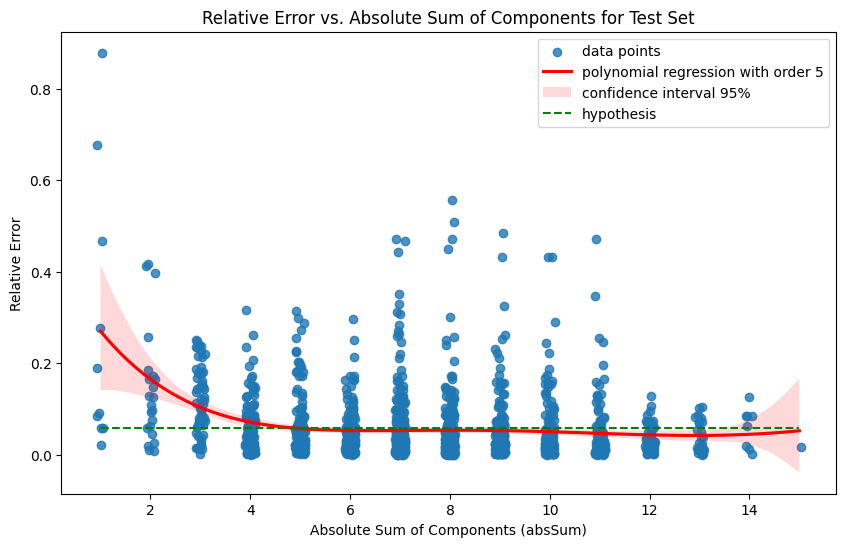

In [18]:
paired_data = sorted(zip(absSum(expressions_not_in_x), relativeError))

# Separate the sorted absSum and relativeError values
sorted_abs_sum = [item[0] for item in paired_data]
sorted_relative_error = [item[1] for item in paired_data]

plt.figure(figsize=(10, 6))
# Use the unpacked lists for regplot
sns.regplot(x=sorted_abs_sum, y=sorted_relative_error, order = 5, x_jitter=0.1, color = "red", scatter_kws ={"color": None}, label="data points")

x_values = np.arange(1,16)
y_values = np.full_like(x_values, np.mean(relativeError), dtype=np.float32)
plt.plot(x_values, y_values, color='green', linestyle='--', label='hypothesis')

print(np.mean(relativeError))
plt.xlabel("Absolute Sum of Components (absSum)")
plt.ylabel("Relative Error") # Changed label to reflect relativeError
plt.title("Relative Error vs. Absolute Sum of Components for Test Set")
plt.legend(["data points", "polynomial regression with order 5", "confidence interval 95%", "hypothesis"])
plt.savefig("C:/Users/A_118784/Desktop/KSBa/python/MaturaPro/jupyterDir/simpleRNN_graphs/fig2.png")
plt.show()

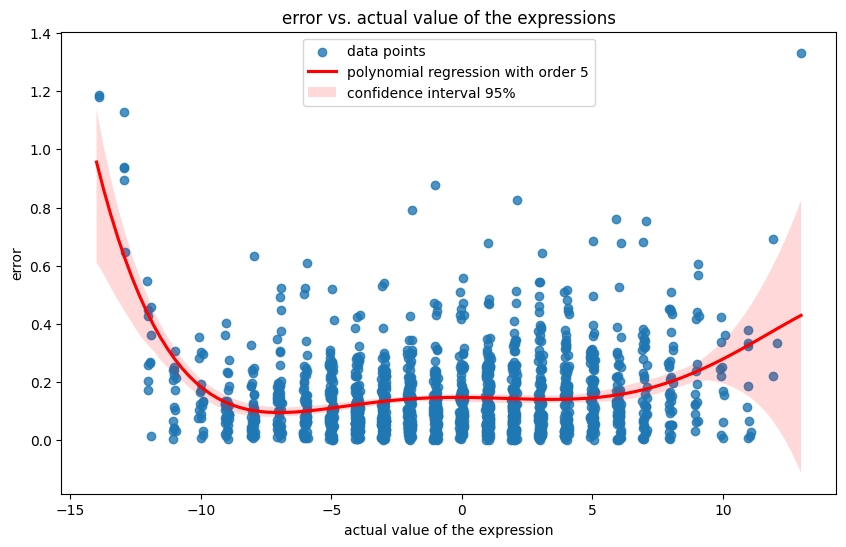

In [19]:
paired_data = sorted(zip(y_test, differences))

# Separate the sorted absSum and relativeError values
sorted_abs_sum = [item[0] for item in paired_data]
sorted_relative_error = [item[1] for item in paired_data]

plt.figure(figsize=(10, 6))
# Use the unpacked lists for regplot
sns.regplot(x=sorted_abs_sum, y=sorted_relative_error, order = 5, x_jitter=0.1, color = "red", scatter_kws ={"color": None}, label="data points")


plt.xlabel("actual value of the expression")
plt.ylabel("error") # Changed label to reflect relativeError
plt.title("error vs. actual value of the expressions")
plt.legend(["data points", "polynomial regression with order 5", "confidence interval 95%"])
plt.savefig("C:/Users/A_118784/Desktop/KSBa/python/MaturaPro/jupyterDir/simpleRNN_graphs/fig3.png")
plt.show()

0.058715183


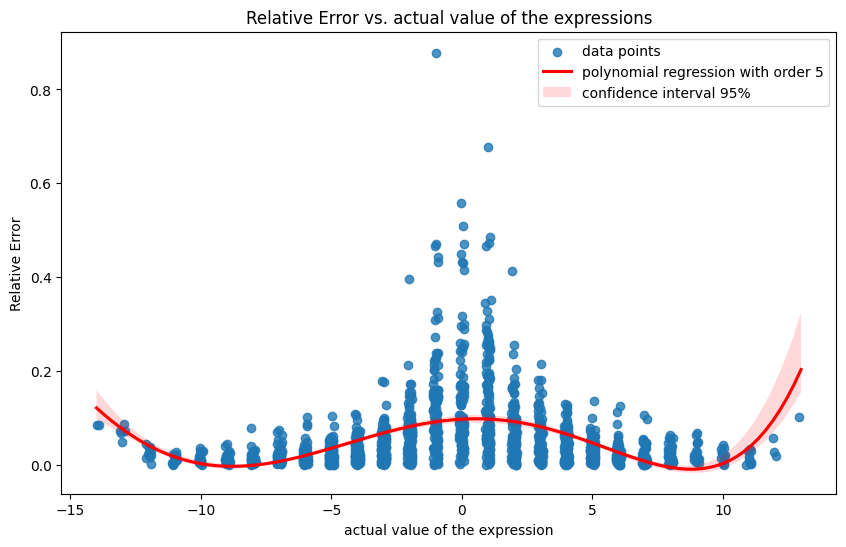

In [20]:
paired_data = sorted(zip(y_test, relativeError))

# Separate the sorted absSum and relativeError values
sorted_abs_sum = [item[0] for item in paired_data]
sorted_relative_error = [item[1] for item in paired_data]

plt.figure(figsize=(10, 6))
# Use the unpacked lists for regplot
sns.regplot(x=sorted_abs_sum, y=sorted_relative_error, order = 5, x_jitter=0.1, color = "red", scatter_kws ={"color": None}, label="data points")

print(np.mean(relativeError))
plt.xlabel("actual value of the expression")
plt.ylabel("Relative Error") # Changed label to reflect relativeError
plt.title("Relative Error vs. actual value of the expressions")
plt.legend(["data points", "polynomial regression with order 5", "confidence interval 95%"])
plt.savefig("C:/Users/A_118784/Desktop/KSBa/python/MaturaPro/jupyterDir/simpleRNN_graphs/fig4.png")
plt.show()

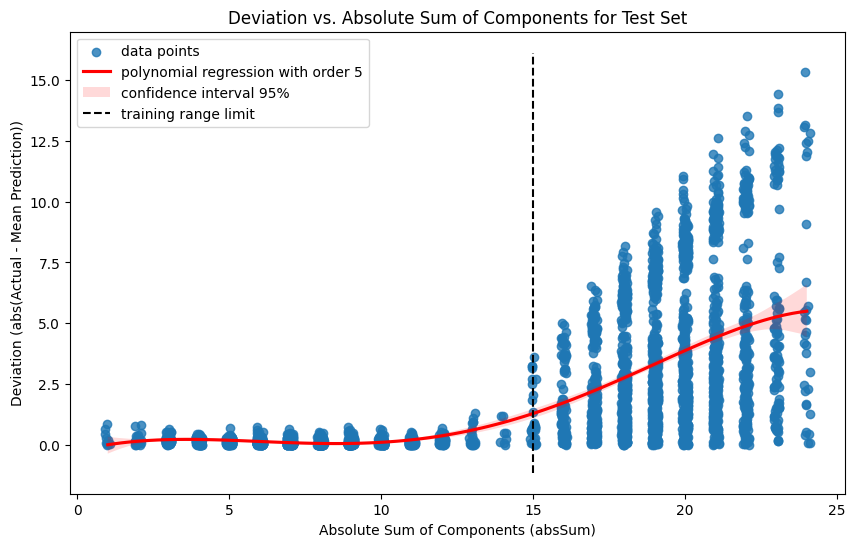

In [21]:
most_Expr =outsideExpr + expressions_not_in_x
most_deviation = out_differences + differences
most_absSum = absSum(outsideExpr) + absSum(expressions_not_in_x)

paired_data = sorted(zip(most_absSum, most_deviation))

# Separate the sorted absSum and relativeError values
sorted_abs_sum = [item[0] for item in paired_data]
sorted_relative_error = [item[1] for item in paired_data]

plt.figure(figsize=(10, 6))
# Use the unpacked lists for regplot
sns.regplot(x=sorted_abs_sum, y=sorted_relative_error, order = 5, x_jitter=0.1, color = "red", scatter_kws ={"color": None}, label="data points")


# Define the x-coordinate for the vertical line
vertical_line_x = 15

# Define the y-range for the vertical line (adjust as needed)
# You can use the range of your data's y-values or a specific range
# For example, to cover the range of your plotted data:
min_y = min(plt.gca().get_ylim()) # Get the current y-axis limits
max_y = max(plt.gca().get_ylim())
vertical_line_y = np.linspace(min_y, max_y, 100) # Create a range of y values

plt.plot(np.full_like(vertical_line_y, vertical_line_x), vertical_line_y, color='black', linestyle='--', label='training range limit')


plt.xlabel("Absolute Sum of Components (absSum)")
plt.ylabel("Deviation (abs(Actual - Mean Prediction))")
plt.title("Deviation vs. Absolute Sum of Components for Test Set")
plt.legend(["data points", "polynomial regression with order 5", "confidence interval 95%", "training range limit"])
plt.savefig("C:/Users/A_118784/Desktop/KSBa/python/MaturaPro/jupyterDir/simpleRNN_graphs/fig5.png")
plt.show()


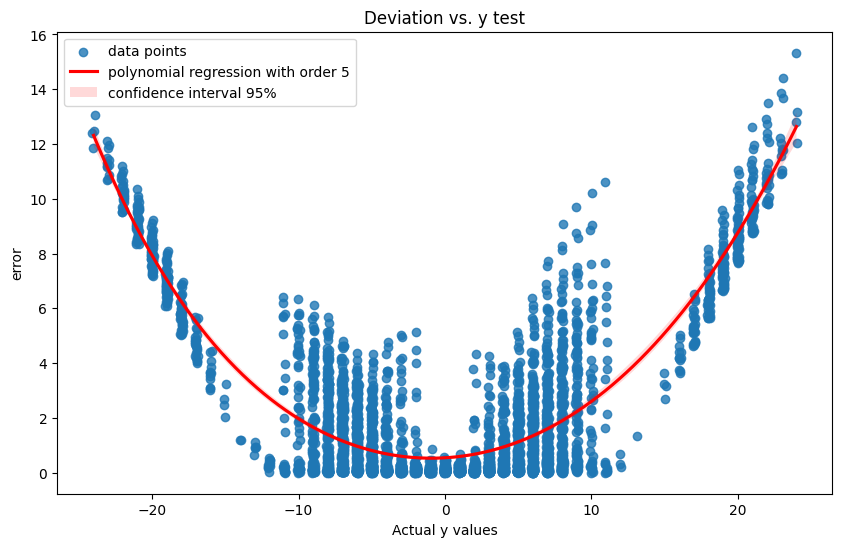

In [22]:
most_Expr =outsideExpr + expressions_not_in_x
most_deviation = out_differences + differences
most_y = out_y_test + y_test

paired_data = sorted(zip(most_y, most_deviation))

sorted_abs_sum = [item[0] for item in paired_data]
sorted_relative_error = [item[1] for item in paired_data]

plt.figure(figsize=(10, 6))
# Use the unpacked lists for regplot
sns.regplot(x=sorted_abs_sum, y=sorted_relative_error, order = 5, x_jitter=0.1, color = "red", scatter_kws ={"color": None}, label="data points")

plt.xlabel("Actual y values")
plt.ylabel("error")
plt.title("Deviation vs. y test")
plt.legend(["data points", "polynomial regression with order 5", "confidence interval 95%"])
plt.savefig("C:/Users/A_118784/Desktop/KSBa/python/MaturaPro/jupyterDir/simpleRNN_graphs/fig6.png")
plt.show()


0.2314769


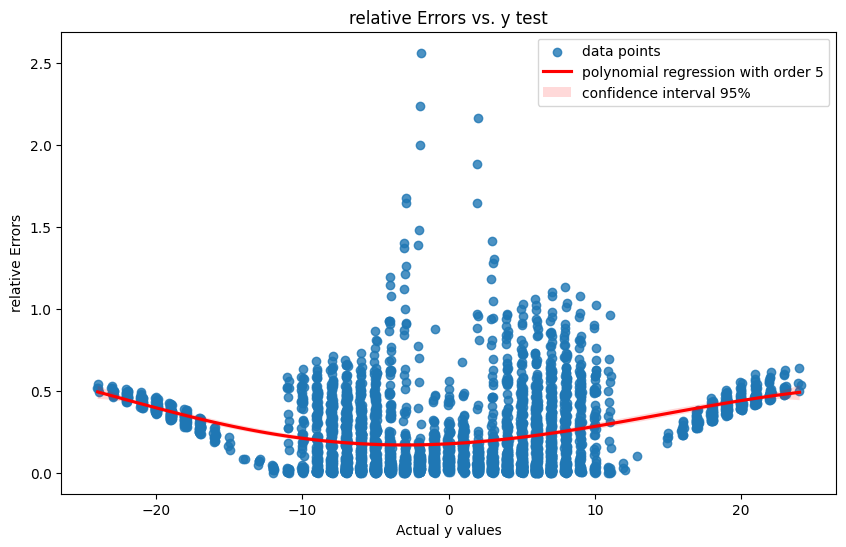

In [23]:
most_Expr =outsideExpr + expressions_not_in_x
most_deviation = out_relativeError + relativeError
most_y = out_y_test + y_test
avRelError = np.mean(most_deviation)

print(avRelError)
paired_data = sorted(zip(most_y, most_deviation))

sorted_abs_sum = [item[0] for item in paired_data]
sorted_relative_error = [item[1] for item in paired_data]

plt.figure(figsize=(10, 6))
# Use the unpacked lists for regplot
sns.regplot(x=sorted_abs_sum, y=sorted_relative_error, order = 5, x_jitter=0.1, color = "red", scatter_kws ={"color": None}, label="data points")

plt.xlabel("Actual y values")
plt.ylabel("relative Errors")
plt.title("relative Errors vs. y test")
plt.legend(["data points", "polynomial regression with order 5", "confidence interval 95%"])
plt.savefig("C:/Users/A_118784/Desktop/KSBa/python/MaturaPro/jupyterDir/simpleRNN_graphs/fig7.png")
plt.show()


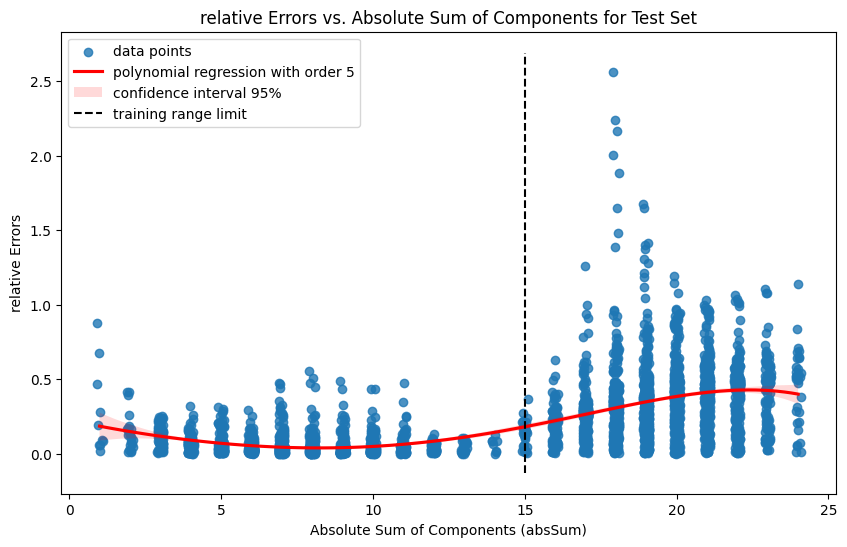

In [24]:
most_Expr =outsideExpr + expressions_not_in_x
most_deviation = out_relativeError + relativeError
most_absSum = absSum(outsideExpr) + absSum(expressions_not_in_x)

paired_data = sorted(zip(most_absSum, most_deviation))

sorted_abs_sum = [item[0] for item in paired_data]
sorted_relative_error = [item[1] for item in paired_data]

plt.figure(figsize=(10, 6))
# Use the unpacked lists for regplot
sns.regplot(x=sorted_abs_sum, y=sorted_relative_error, order = 5, x_jitter=0.1, color = "red", scatter_kws ={"color": None}, label="data points")


# Define the x-coordinate for the vertical line
vertical_line_x = 15

# Define the y-range for the vertical line (adjust as needed)
# You can use the range of your data's y-values or a specific range
# For example, to cover the range of your plotted data:
min_y = min(plt.gca().get_ylim()) # Get the current y-axis limits
max_y = max(plt.gca().get_ylim())
vertical_line_y = np.linspace(min_y, max_y, 100) # Create a range of y values

plt.plot(np.full_like(vertical_line_y, vertical_line_x), vertical_line_y, color='black', linestyle='--', label='training range limit')


plt.xlabel("Absolute Sum of Components (absSum)")
plt.ylabel("relative Errors")
plt.title("relative Errors vs. Absolute Sum of Components for Test Set")
plt.legend(["data points", "polynomial regression with order 5", "confidence interval 95%", "training range limit"])
plt.savefig("C:/Users/A_118784/Desktop/KSBa/python/MaturaPro/jupyterDir/simpleRNN_graphs/fig8.png")
plt.show()


700
3.0921128
700


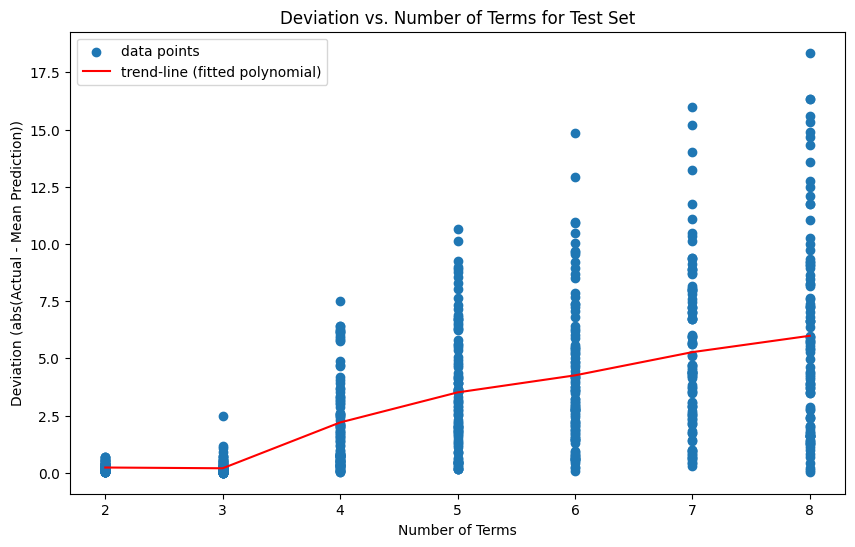

In [25]:
long_deviation = []
for i in range(len(predsLongRange)): long_deviation.append(abs(predsLongRange[i] - long_y_test[i]))
print(len(long_deviation))
print(np.mean(long_deviation))

repeated_integers = []
for i in range(minNums, maxNums + 1):
  repeated_integers.extend([i] * amountNums)
print(len(long_deviation))
repeated_integers = np.array(repeated_integers)

long_coef = np.polyfit(repeated_integers, long_deviation, 5)


plt.figure(figsize=(10, 6))
plt.scatter(repeated_integers, long_deviation,  label = "data points")
plt.plot(repeated_integers, np.polyval(long_coef, repeated_integers), color='red', label=("trend-line (fitted polynomial)"))
plt.xlabel("Number of Terms")
plt.ylabel("Deviation (abs(Actual - Mean Prediction))")
plt.title("Deviation vs. Number of Terms for Test Set")
plt.legend()
plt.savefig("C:/Users/A_118784/Desktop/KSBa/python/MaturaPro/jupyterDir/simpleRNN_graphs/fig9.png")
plt.show()